# GNP coated by protein

## Load modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd
import PyMieScatt as ps

%matplotlib inline
import matplotlib
font = {#'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

## Load refractive index

In [2]:
#read data of wavelength, n, k, x1, xn, xd
[nv2, kv2, wv2, dv2, nkd]=pickle.load(open("../data/gold_nk.pkl", "rb" ))
nkd.shape

## single sphere
[nv2, kv2, wv2, dv2, datav]=pickle.load(open("../data/gold_mie.pkl", "rb" ))
[qextv,qscav, qabsv, qbackv,gv]=datav

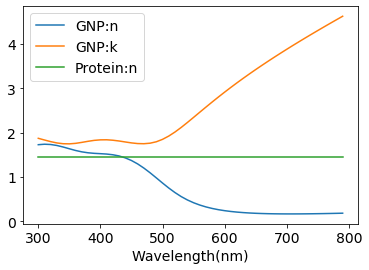

In [10]:
def run_mie(nv, kv, wv, dv):
    nd=len(dv)
    nwv=len(wv)
    
    #run the mie code for above parameters
    miev=np.array([[ps.MieQ(nv[i]+kv[i]*1.0j,wv[i],dv[j],asDict=True) \
                    for j in range(nd)] \
                   for i in range(nwv)])

    qextv=np.array([[miev[i,j]['Qext'] for j in range(nd)]for i in range(nwv)])
    qscav=np.array([[miev[i,j]['Qsca'] for j in range(nd)]for i in range(nwv)])
    qabsv=np.array([[miev[i,j]['Qabs'] for j in range(nd)]for i in range(nwv)])
    qbackv=np.array([[miev[i,j]['Qback'] for j in range(nd)]for i in range(nwv)])
    gv=np.array([[miev[i,j]['g'] for j in range(nd)]for i in range(nwv)])

    return [qextv,qscav, qabsv, qbackv,gv]

#refractive index for protein 1.45+0.0i
nv1=np.repeat(1.45,len(nv2))
kv1=np.zeros(len(kv2))
[qextv1,qscav1, qabsv1, qbackv1,gv1]=run_mie(nv1, kv1, wv2, dv2)

[qextv2,qscav2, qabsv2, qbackv2,gv2]=run_mie(nv2, kv2, wv2, dv2)

plt.plot(wv2, nv2,label='GNP:n')
plt.plot(wv2, kv2,label='GNP:k')
plt.plot(wv2,nv1,label='Protein:n')
plt.xlabel("Wavelength(nm)")
plt.legend()

## <font color='red'>Python Mie Code for coated sphere </font>

- <a href="https://pymiescatt.readthedocs.io/en/latest/">PyMieScatt: Python Mie code document</a>
- MieQCoreShell(mCore, mShell, wavelength, dCore, dShell[, asDict=False, asCrossSection=False])

In [86]:
def run_mie_coated(nv, kv, wv, dv,mshell=1.45+0.0j, tshell=20):
    nd=len(dv)
    nwv=len(wv)
    
    #run the mie code for above parameters
    miev=np.array([[ps.MieQCoreShell(nv[i]+kv[i]*1.0j,mshell, wv[i],dv[j],dv[j]+tshell,asDict=True) \
                    for j in range(nd)] \
                   for i in range(nwv)])

    qextv=np.array([[miev[i,j]['Qext'] for j in range(nd)]for i in range(nwv)])
    qscav=np.array([[miev[i,j]['Qsca'] for j in range(nd)]for i in range(nwv)])
    qabsv=np.array([[miev[i,j]['Qabs'] for j in range(nd)]for i in range(nwv)])
    qbackv=np.array([[miev[i,j]['Qback'] for j in range(nd)]for i in range(nwv)])
    gv=np.array([[miev[i,j]['g'] for j in range(nd)]for i in range(nwv)])

    return [qextv,qscav, qabsv, qbackv,gv]



In [87]:
def plot_2p(wv2, qextv,qextv2, tshell,ylabel="$Q_{ext}$",\
            scale='linear',label1='GNP', label2='Coated GNP', \
            idvv=[0,1,2,3],figsize=(6,9),
           outfile=''):
    n1=len(idvv)
    plt.figure(figsize=figsize)
    for j,idv in enumerate(idvv):
        
        ax=plt.subplot(n1,1, j+1)
        ax.set_yscale(scale)
        plt.plot(wv2,qextv[:,idv],label=label1+":%3.2f" % (dv2[idv]))
        plt.plot(wv2,qextv2[:,idv],label=label2+":%3.2f" % (dv2[idv]+tshell))
        plt.legend(bbox_to_anchor=(1,1), title='Diameter')
        #plt.title("Diameter(nm)(GNP:%3.2f,Protein:%3.2f)"%(,10))
        plt.xlabel("Wavelength(nm)")
        plt.ylabel(ylabel)
        
    plt.tight_layout()
    plt.savefig(outfile)

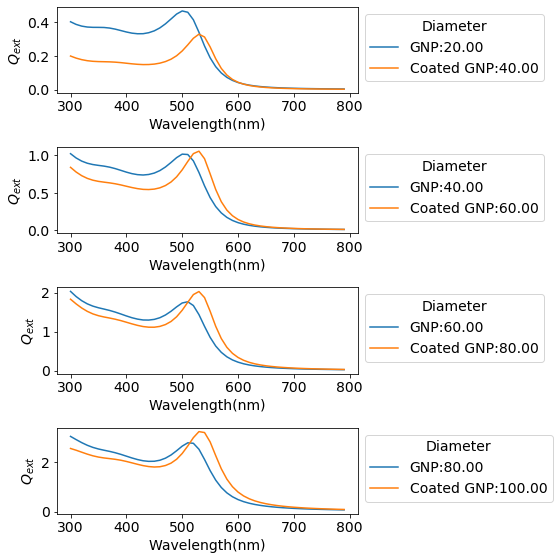

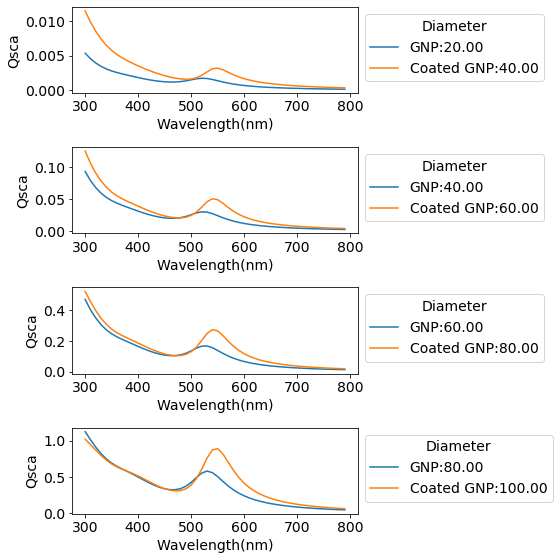

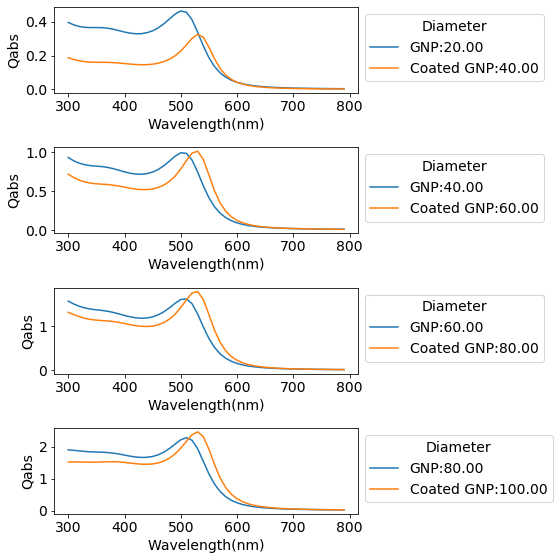

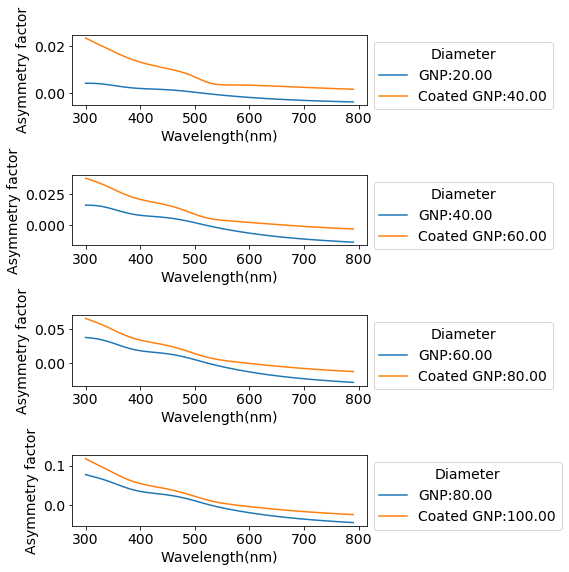

In [92]:
tshell=20
[qextv3,qscav3, qabsv3, qbackv3,gv3]=run_mie_coated(nv2, kv2, wv2, dv2,tshell=tshell)

outfile="/Users/mgao1//Desktop/t6_coated_qext.png"
plot_2p(wv2, qextv2,qextv3, tshell,idvv=[1,3,5,7],figsize=(8,8),outfile=outfile)

outfile="/Users/mgao1//Desktop/t6_coated_qsca.png"
plot_2p(wv2, qscav2,qscav3, tshell,ylabel='Qsca',idvv=[1,3,5,7],figsize=(8,8),outfile=outfile)

outfile="/Users/mgao1//Desktop/t6_coated_qabs.png"
plot_2p(wv2, qabsv2,qabsv3, tshell,ylabel='Qabs',idvv=[1,3,5,7],figsize=(8,8),outfile=outfile)

outfile="/Users/mgao1//Desktop/t6_coated_g.png"
plot_2p(wv2, gv2,gv3, tshell,ylabel='Asymmetry factor',idvv=[1,3,5,7],figsize=(8,8),outfile=outfile)

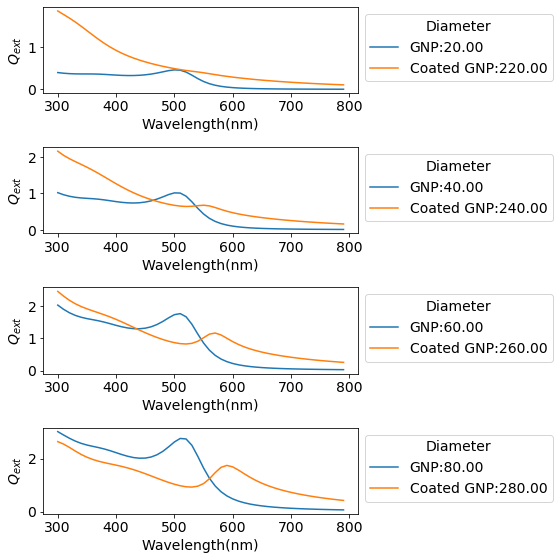

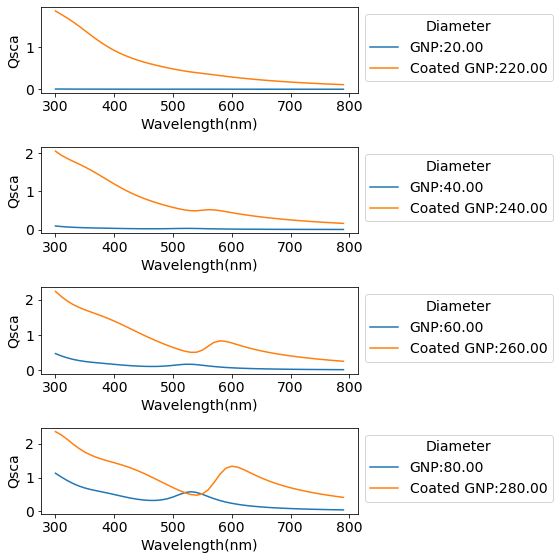

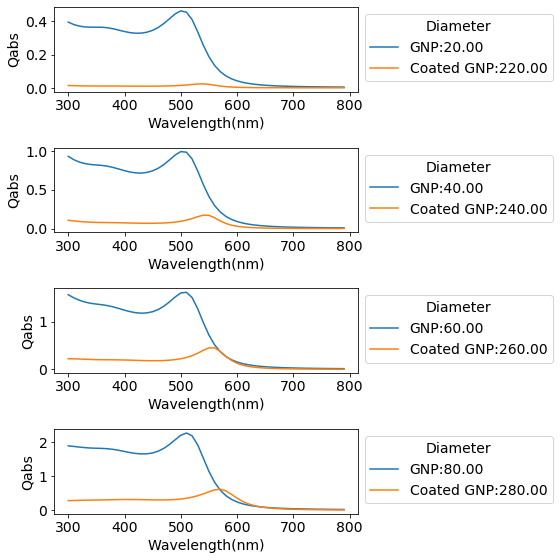

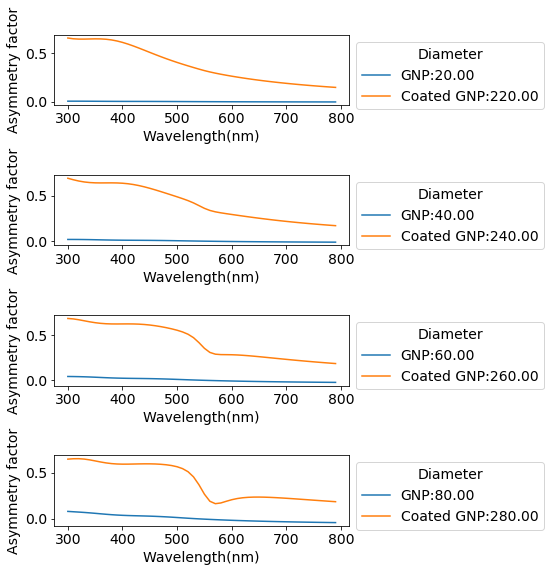

In [93]:
#play with a super thick coating

tshell=200
[qextv3,qscav3, qabsv3, qbackv3,gv3]=run_mie_coated(nv2, kv2, wv2, dv2,tshell=tshell)

outfile="/Users/mgao1//Desktop/t6_coated_qext2.png"
plot_2p(wv2, qextv2,qextv3, tshell,idvv=[1,3,5,7],figsize=(8,8),outfile=outfile)

outfile="/Users/mgao1//Desktop/t6_coated_qsca2.png"
plot_2p(wv2, qscav2,qscav3, tshell,ylabel='Qsca',idvv=[1,3,5,7],figsize=(8,8),outfile=outfile)

outfile="/Users/mgao1//Desktop/t6_coated_qabs2.png"
plot_2p(wv2, qabsv2,qabsv3, tshell,ylabel='Qabs',idvv=[1,3,5,7],figsize=(8,8),outfile=outfile)

outfile="/Users/mgao1//Desktop/t6_coated_g2.png"
plot_2p(wv2, gv2,gv3, tshell,ylabel='Asymmetry factor',idvv=[1,3,5,7],figsize=(8,8),outfile=outfile)

In [ ]:
Only when